# MODEL TRAINING

**Import data and required packages**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings


In [4]:
df = pd.read_csv('data/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Preparing X and y variables

In [6]:
X = df.drop(columns=['expenses'], axis=1)
y = df['expenses']

In [7]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [8]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

Seperating Numerical and Categorical features

In [9]:
categorical_features = list(X.select_dtypes(include='object').columns)
numerical_features = list(X.select_dtypes(exclude='object').columns)

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [11]:
numerical_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder()),
        ('scaler', StandardScaler(with_mean=False))
    ]
)

In [12]:
preprocessor = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, numerical_features),
    ('categorical_pipeline', categorical_pipeline, categorical_features)
])

In [13]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [14]:
y.shape

(1338,)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(1338, 11)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)

In [18]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

Create an Evaluate Function to give all metrics after model Training

In [19]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, mae, r2

In [20]:
models = {
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "Linear Regression" : LinearRegression(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "K-Neighbour Regressor" : KNeighborsRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "Cat Boost Regressor" : CatBoostRegressor()
   
}

In [21]:
model_list = []
r2_list = []

In [22]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    mse, mae, r2 = evaluate_model(y_test, y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(r2)

    print("Mean Squared Error : {:.4f}".format(mse))
    print("Mean Absolute Error : {:.4f}".format(mae))
    print("R2 Score : {:.4f}".format(r2))
    print("_______________________________________")

Ridge
Mean Squared Error : 37033180.0576
Mean Absolute Error : 4190.8780
R2 Score : 0.7599
_______________________________________
Lasso
Mean Squared Error : 37032259.9470
Mean Absolute Error : 4190.7040
R2 Score : 0.7599
_______________________________________
Linear Regression
Mean Squared Error : 36902081.7683
Mean Absolute Error : 4189.3381
R2 Score : 0.7608
_______________________________________
Decision Tree Regressor
Mean Squared Error : 41485696.1918
Mean Absolute Error : 3151.5060
R2 Score : 0.7311
_______________________________________
K-Neighbour Regressor
Mean Squared Error : 33887969.6149
Mean Absolute Error : 3458.1670
R2 Score : 0.7803
_______________________________________
AdaBoost Regressor
Mean Squared Error : 28652608.4302
Mean Absolute Error : 4418.5831
R2 Score : 0.8142
_______________________________________
XGB Regressor
Mean Squared Error : 34623454.8292
Mean Absolute Error : 3367.8120
R2 Score : 0.7755
_______________________________________
Gradient Boostin

100:	learn: 4131.0088739	total: 347ms	remaining: 3.09s
101:	learn: 4127.4435820	total: 350ms	remaining: 3.08s
102:	learn: 4124.0302836	total: 352ms	remaining: 3.06s
103:	learn: 4116.1972420	total: 354ms	remaining: 3.04s
104:	learn: 4112.9628767	total: 356ms	remaining: 3.04s
105:	learn: 4105.8448631	total: 358ms	remaining: 3.02s
106:	learn: 4101.6478998	total: 360ms	remaining: 3.01s
107:	learn: 4099.9056963	total: 361ms	remaining: 2.98s
108:	learn: 4096.4229064	total: 364ms	remaining: 2.98s
109:	learn: 4091.5494889	total: 369ms	remaining: 2.98s
110:	learn: 4087.3937613	total: 373ms	remaining: 2.98s
111:	learn: 4083.5433585	total: 375ms	remaining: 2.97s
112:	learn: 4078.1756511	total: 379ms	remaining: 2.97s
113:	learn: 4073.1200690	total: 381ms	remaining: 2.96s
114:	learn: 4069.1183257	total: 382ms	remaining: 2.94s
115:	learn: 4063.3440861	total: 384ms	remaining: 2.93s
116:	learn: 4059.8897643	total: 386ms	remaining: 2.92s
117:	learn: 4056.7710930	total: 389ms	remaining: 2.91s
118:	learn

**Result**

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,Gradient Boosting Regressor,0.846683
8,Cat Boost Regressor,0.824959
5,AdaBoost Regressor,0.814249
4,K-Neighbour Regressor,0.780309
6,XGB Regressor,0.775541
2,Linear Regression,0.760769
1,Lasso,0.759925
0,Ridge,0.759919
3,Decision Tree Regressor,0.731054


In [30]:
model = DecisionTreeRegressor()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 73.88


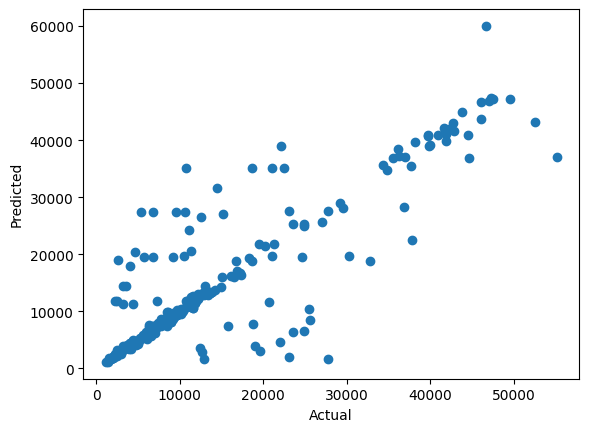

In [31]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [32]:
model = GradientBoostingRegressor()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.67


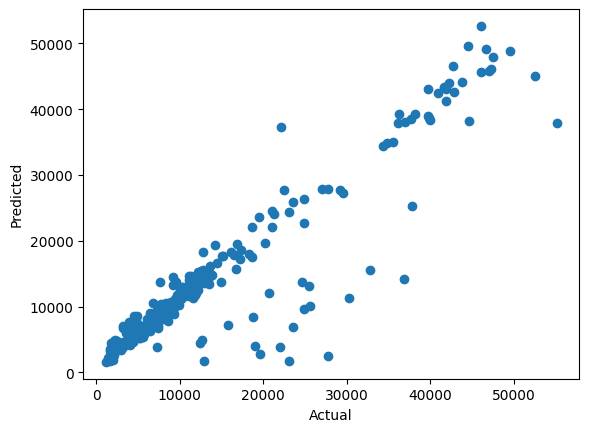

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');